<a href="https://colab.research.google.com/github/MLUISG/Projects/blob/main/Mark_Guereque_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 Data Analysis 

### Problem Definition


> Can we use property information to find key variables that predict future assessments?




### Imports

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import statsmodels.api as sm
from scipy import stats

###Mark's Radical Functions

In [ ]:
def show_me(df):
  """Displays info, describe, head, and tail
  
Money in the bank,
Show me the stats and details,
Info, head, tail, done."""
  print('Info')  
  print(df.info())
  print('\n')
  print('\n')
  print('Described')
  print(df.describe().T)
  print('\n')
  print('\n')
  print('Head')
  print(df.head().T)
  print('\n')
  print('\n')
  print('Tail')
  print(df.tail().T)

In [ ]:
def find_tuple_cols(df):
  """

Tuple columns sought,
Amidst the data's great breadth,
Found and returned whole."""
  tuple_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, tuple)).any()]
  return tuple_cols

In [ ]:
def convert_tuples_to_lists(df):
  """

From tuples to lists,
DataFrame transformed with ease,
Data now unbound."""
  for col in df.columns:
      if type(df[col][0]) == tuple:
          df[col] = df[col].apply(list)
  return df

In [ ]:
def all_the_value_counts(df):
    """Prints the value counts for all columns in a pandas DataFrame
    
Counting values wide,
All columns, one by one revealed,
Insight to be found."""
    for column in df.columns:
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")

In [ ]:
def remove_outliers(df):
  """

Outliers expelled,
Data purged of impurities,
Clean and pristine now."""
  cleaned_data = df
  for col in df.columns:
      mean = df[col].mean()
      std = df[col].std()
      threshold = 3 * std
      lower_bound = mean - threshold
      upper_bound = mean + threshold
      cleaned_data[col] = df[col][(df[col] > lower_bound) & (df[col] < upper_bound)]
  return cleaned_data

In [ ]:
def count_the_cats(df):
    """Prints the value counts for categorical columns in a pandas DataFrame
    
Meow, count the cats,
Categorical values,
Pandas purrs content.
    """
    for column in df.select_dtypes(include=["category", "object"]).columns:
        print(f"Value counts for {column}:")
        print(df[column].value_counts())
        print("\n")

In [ ]:
def impute_means(df):
  """Imputes the mean value of a column to all null values in that column
  
Missing values found,
Impute means to numeric cols,
Clean data once more."""
  for col in df.columns:
        if df[col].isna().sum() == 0:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
  return df

In [ ]:
def count_nulls(data):
    """Checks for null values and displays only nulls
    
Null values abound,
Display them with a function,
Data cleaning done."""
    temp = data.isna().sum()
    filter = temp > 0
    print(data.shape)
    print(temp[filter])

# The Data 



###Load Data

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
data_path = '/drive/My Drive/Project 2/Data/Housing Data.csv'

In [ ]:
master_data = pd.read_csv(data_path)

### Collection/Source
Data was collected from the Assessor's Office and represents property values between 2006 to 2010.

##IDA intitial data analaysis

In [ ]:
master_data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


In [ ]:
find_tuple_cols(master_data)

[]

In [ ]:
master_data.shape

(2637, 81)

###Data Info

In [ ]:
show_me(master_data)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Q

###Value Counts

In [ ]:
all_the_value_counts(master_data)

Value counts for PID:
905101070    1
902400090    1
528188120    1
903458170    1
527252070    1
            ..
533250190    1
531363010    1
527451640    1
909250120    1
528292060    1
Name: PID, Length: 2637, dtype: int64


Value counts for MS SubClass:
20     968
60     531
50     253
120    173
30     126
160    117
70     115
80     105
90      95
190     54
85      45
75      19
45      16
180     14
40       5
150      1
Name: MS SubClass, dtype: int64


Value counts for MS Zoning:
RL         2043
RM          419
FV          123
C (all)      25
RH           23
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


Value counts for Lot Frontage:
60.0     247
80.0     124
70.0     123
50.0     104
75.0      95
        ... 
28.0       1
31.0       1
174.0      1
152.0      1
195.0      1
Name: Lot Frontage, Length: 126, dtype: int64


Value counts for Lot Area:
9600     42
7200     37
6000     30
9000     26
10800    23
         ..
12568     1
6760      1
18386     1
1108

###Null Count

In [ ]:
count_nulls(master_data)

(2637, 81)
Lot Frontage       449
Alley             2457
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           73
Bsmt Cond           73
Bsmt Exposure       76
BsmtFin Type 1      73
BsmtFin SF 1         1
BsmtFin Type 2      74
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1284
Garage Type        145
Garage Yr Blt      147
Garage Finish      147
Garage Cars          1
Garage Area          1
Garage Qual        147
Garage Cond        147
Pool QC           2626
Fence             2109
Misc Feature      2541
dtype: int64


In [ ]:
null_counts = master_data.isnull().sum()
total_nulls = null_counts.sum()
total_nulls

12624

###Data Overview

We can see this is a fairly large dataset with 81 features, 2637 observations, and numerous null values found throughout.

## Data Cleaning

I'm going to immediately drop Alley, Misc Val, Misc Feature, Fence, Fireplace Qu, and Pool QC because they have far to many nulls. I will also be droping PID because it won't help me explore this data.

In [ ]:
trimmed_data = master_data.copy().drop(['PID', 'Alley', 'Misc Val', 'Misc Feature', 'Fence','Fireplace Qu', 'Pool QC'], axis=1)

In [ ]:
count_nulls(trimmed_data)

(2637, 74)
Lot Frontage      449
Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Qual          73
Bsmt Cond          73
Bsmt Exposure      76
BsmtFin Type 1     73
BsmtFin SF 1        1
BsmtFin Type 2     74
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Type       145
Garage Yr Blt     147
Garage Finish     147
Garage Cars         1
Garage Area         1
Garage Qual       147
Garage Cond       147
dtype: int64


In [ ]:
impute_means(trimmed_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2007,WD,Normal,115400
1,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,90000
2,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,162,0,0,126,0,12,2007,WD,Normal,141000
3,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,184,0,0,0,0,4,2010,WD,Normal,254000
4,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Normal,114500
2633,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,7,2009,WD,Normal,162000
2634,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,78,0,0,0,0,9,2009,WD,Normal,211500
2635,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,165000


In [ ]:
trimmed_data.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Mo Sold,Yr Sold,SalePrice
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,...,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,57.349261,69.166819,10044.694729,6.097459,5.569966,1971.288586,1984.202882,101.887911,438.441199,51.068665,...,470.968134,94.305271,46.984452,22.813424,2.368601,15.775123,2.130072,6.243838,2007.795601,179986.230186
std,42.499091,21.274759,6742.549521,1.411522,1.118262,30.306986,20.913077,178.793075,449.517037,172.489076,...,212.776534,126.927272,66.564333,61.177638,23.160600,55.783751,35.140140,2.722093,1.306403,78309.251522
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7436.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,69.166819,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,78.000000,11526.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,732.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,584.000000,407.000000,576.000000,800.000000,12.000000,2010.000000,745000.000000


Because the rest of the nulls are low percentage to the rest of the data, I'm going to impute the mean to complete my dataset.

In [ ]:
count_nulls(trimmed_data)

(2637, 74)
Mas Vnr Type       23
Bsmt Qual          73
Bsmt Cond          73
Bsmt Exposure      76
BsmtFin Type 1     73
BsmtFin Type 2     74
Garage Type       145
Garage Finish     147
Garage Qual       147
Garage Cond       147
dtype: int64


The remaining nulls are for categorical data. Because it it categorical I've decided to replace nulls with 'UNK' for unknown data.

In [ ]:
working_data = trimmed_data.fillna('UNK')

In [ ]:
count_nulls(working_data)

(2637, 74)
Series([], dtype: int64)


#EDA

#Correation Data

<Axes: >

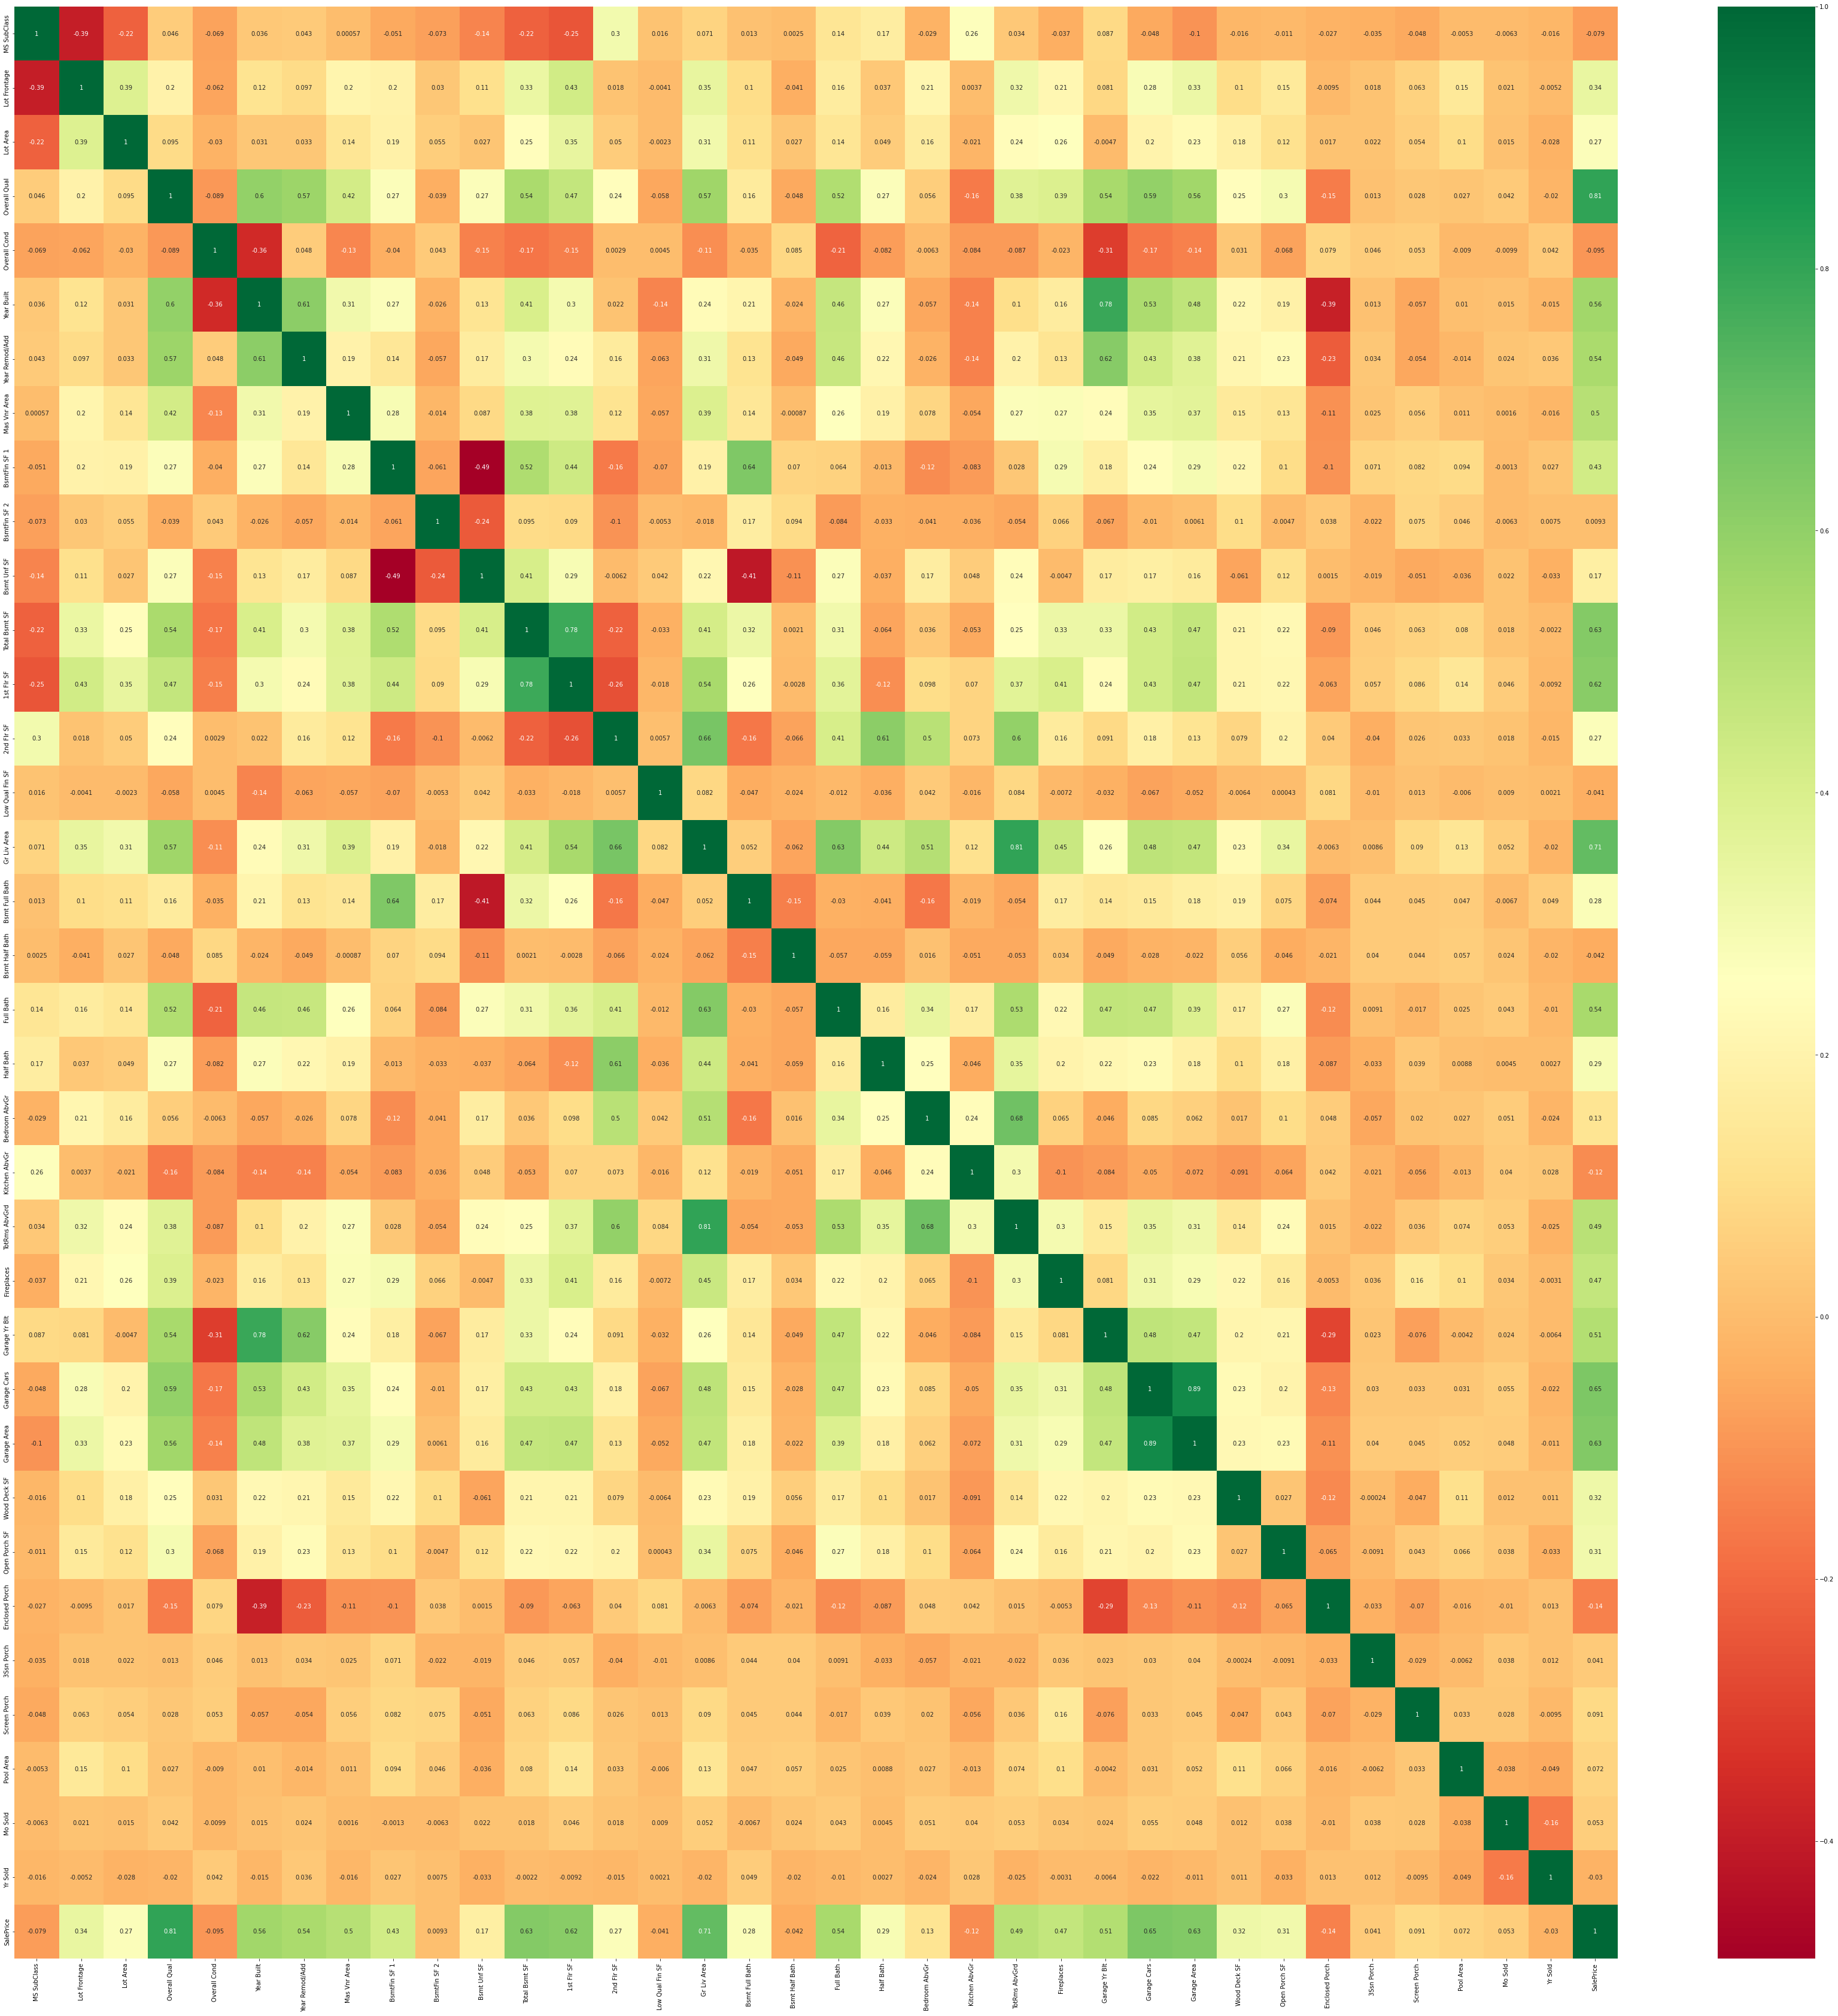

In [ ]:
data_corr = working_data.corr()
plt.figure(figsize=(60,60))
sns.heatmap(data_corr, annot=True, cmap='RdYlGn')

This correlation matrix helps visualize the data, but my code below will create a threshold to find what is the best response variables for our target 'SalePrice'.

In [ ]:
saleprice_response_variable = data_corr[(data_corr['SalePrice'] > 0.62) | (data_corr['SalePrice'] < -0.2)].index.tolist()
saleprice_response_variable.remove('SalePrice')
print(saleprice_response_variable)

['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']


I'm going to narrow down the data that fit my threshold. 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area' are going to be my five best variables.

In [ ]:
saleprice_response_variable = data_corr[(data_corr['SalePrice'] > 0.8) | (data_corr['SalePrice'] < -0.2)].index.tolist()
saleprice_response_variable.remove('SalePrice')
print(saleprice_response_variable)

['Overall Qual']


In [ ]:
print(working_data['SalePrice'].corr(working_data['Overall Qual']))

0.8050159495026092


We can see that 'Overall Qual' is our best response variable with a score of 0.805. Because 'Overall Qual' uses categorical data I'll have to one-hot encode it so it can be modeled.

#Data Processing


In [ ]:
working_data_dropped = working_data[['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']]


In [ ]:
working_data_dropped.head()

,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Garage Cars,Garage Area
0,115400,4,1005.0,1005,2.0,440.0
1,90000,4,0.0,1296,2.0,516.0
2,141000,6,780.0,1375,1.0,544.0
3,254000,8,975.0,1848,2.0,592.0
4,155000,7,560.0,1135,2.0,576.0


#Pair Plot

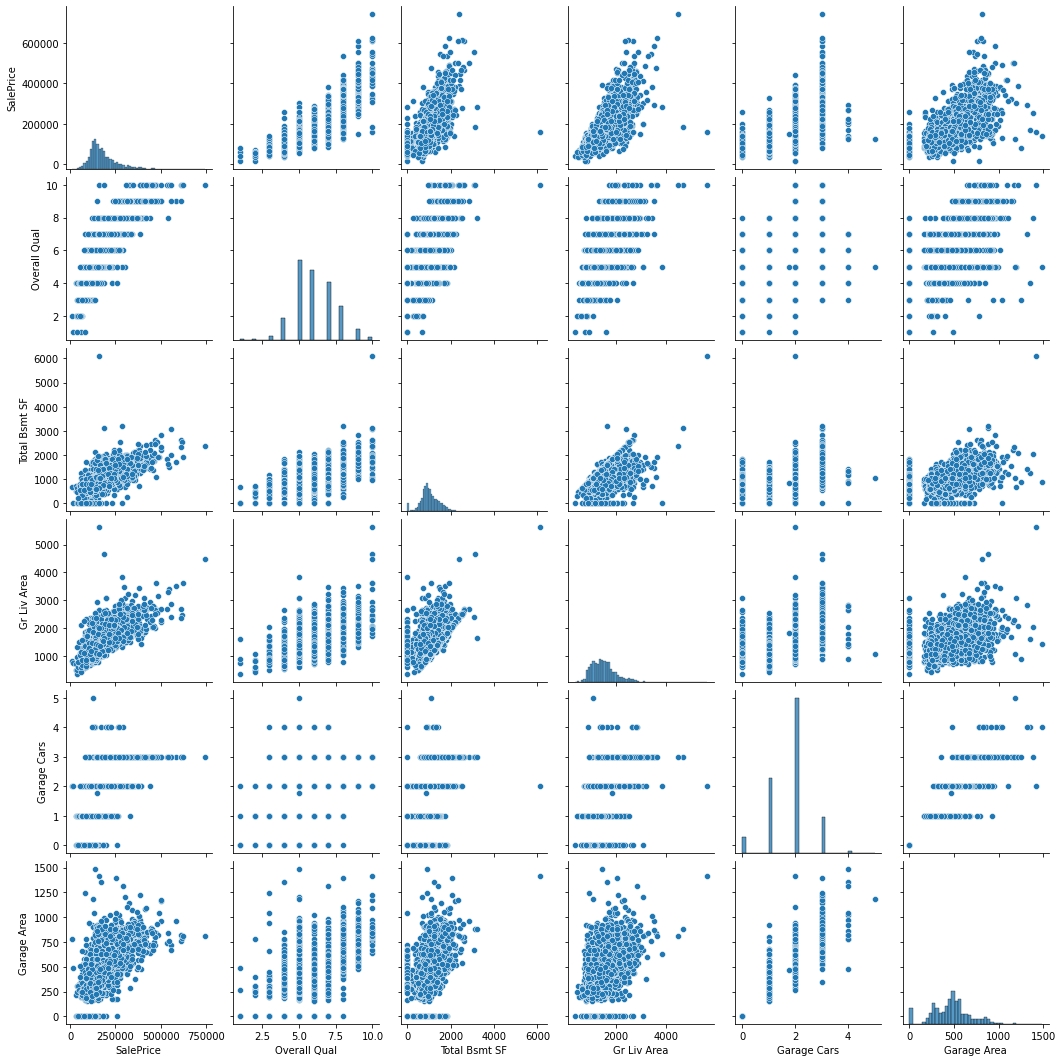

In [ ]:
sns.pairplot(working_data_dropped)

In [ ]:
working_data_dropped.describe()

,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Garage Cars,Garage Area
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,179986.230186,6.097459,1045.179059,1496.985210,1.763278,470.968134
std,78309.251522,1.411522,429.604578,495.209631,0.760432,212.776534
min,12789.000000,1.000000,0.000000,334.000000,0.000000,0.000000
25%,129500.000000,5.000000,792.000000,1128.000000,1.000000,325.000000
50%,160000.000000,6.000000,988.000000,1441.000000,2.000000,480.000000
75%,213000.000000,7.000000,1290.000000,1740.000000,2.000000,576.000000
max,745000.000000,10.000000,6110.000000,5642.000000,5.000000,1488.000000


I can see many outliers that could affect my prediction so I'm goint to remove those to keep my data consistent. 

In [ ]:
remove_outliers(working_data_dropped)

<ipython-input-6-dc4899806913>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = df[col][(df[col] > lower_bound) & (df[col] < upper_bound)]


,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Garage Cars,Garage Area
0,115400.0,4.0,1005.0,1005.0,2.0,440.0
1,90000.0,4.0,0.0,1296.0,2.0,516.0
2,141000.0,6.0,780.0,1375.0,1.0,544.0
3,254000.0,8.0,975.0,1848.0,2.0,592.0
4,155000.0,7.0,560.0,1135.0,2.0,576.0
...,...,...,...,...,...,...
2632,114500.0,6.0,816.0,1176.0,2.0,528.0
2633,162000.0,7.0,1054.0,1061.0,2.0,462.0
2634,211500.0,8.0,1226.0,1226.0,2.0,484.0
2635,165000.0,6.0,1064.0,1350.0,2.0,478.0


In [ ]:
impute_means(working_data_dropped)

<ipython-input-8-83505ea8247d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Garage Cars,Garage Area
0,115400.0,4.0,1005.0,1005.0,2.0,440.0
1,90000.0,4.0,0.0,1296.0,2.0,516.0
2,141000.0,6.0,780.0,1375.0,1.0,544.0
3,254000.0,8.0,975.0,1848.0,2.0,592.0
4,155000.0,7.0,560.0,1135.0,2.0,576.0
...,...,...,...,...,...,...
2632,114500.0,6.0,816.0,1176.0,2.0,528.0
2633,162000.0,7.0,1054.0,1061.0,2.0,462.0
2634,211500.0,8.0,1226.0,1226.0,2.0,484.0
2635,165000.0,6.0,1064.0,1350.0,2.0,478.0


In [ ]:
working_data_dropped.describe()

,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Garage Cars,Garage Area
count,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000,2637.000000
mean,175282.055427,6.105203,1034.067981,1481.932391,1.762050,467.294083
std,67664.367668,1.397464,399.554896,459.200159,0.757813,205.583695
min,12789.000000,2.000000,0.000000,334.000000,0.000000,0.000000
25%,129500.000000,5.000000,792.000000,1128.000000,1.000000,325.000000
50%,160000.000000,6.000000,988.000000,1441.000000,2.000000,478.000000
75%,208000.000000,7.000000,1277.000000,1728.000000,2.000000,576.000000
max,412500.000000,10.000000,2330.000000,2956.000000,4.000000,1105.000000


In [ ]:
count_nulls(working_data_dropped)

(2637, 6)
Series([], dtype: int64)


Text(0.5, 0, 'Response Variables > 0.62')

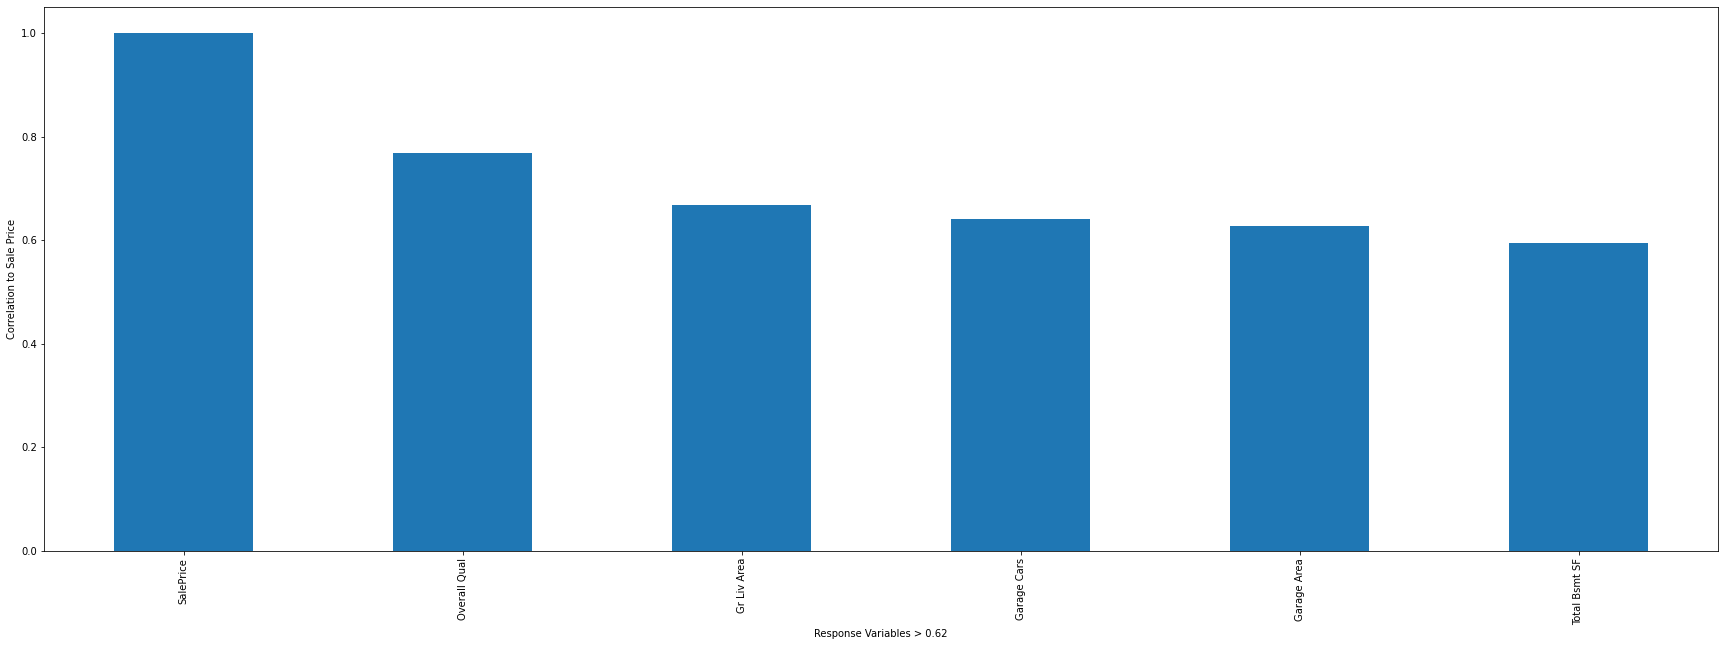

In [ ]:
ax = working_data_dropped.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (30,10))
ax.set_ylabel('Correlation to Sale Price')
ax.set_xlabel('Response Variables > 0.62')

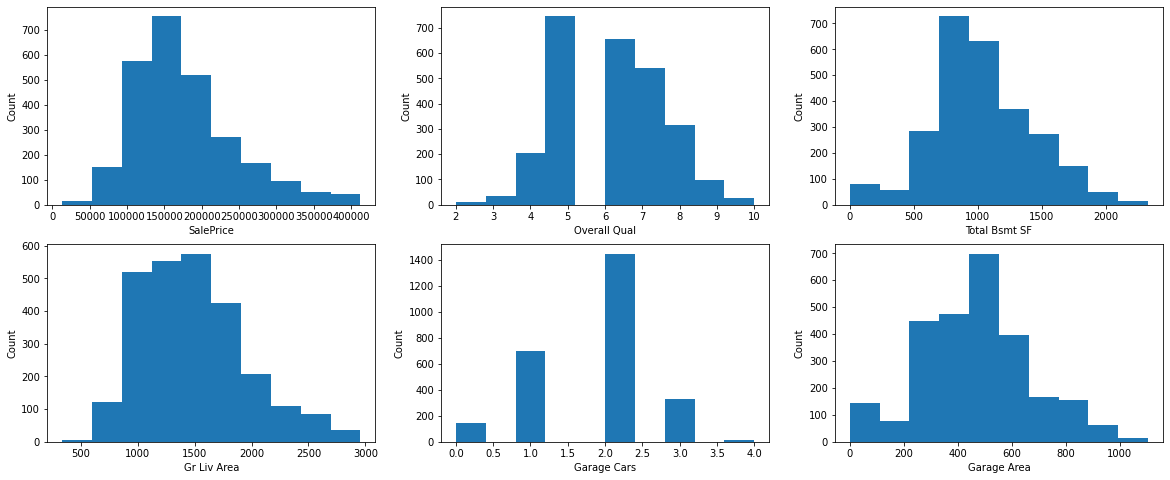

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))
column_names = working_data_dropped.columns
n = 0
for ax in axs.flatten():
    if n < len(column_names):
        ax.hist(working_data_dropped[column_names[n]])
        ax.set_xlabel(column_names[n])
        ax.set_ylabel('Count')
        n = n + 1
    else:
        ax.set_axis_off()

###Target

I am going to now train my 'Target'. My target for this model will be 'SalePrice'.

In [ ]:
X = working_data_dropped[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']]
X2 = sm.add_constant(X)
print(X2.head())

y = working_data_dropped['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=4)

   const  Overall Qual  Total Bsmt SF  Gr Liv Area  Garage Cars  Garage Area
0    1.0           4.0         1005.0       1005.0          2.0        440.0
1    1.0           4.0            0.0       1296.0          2.0        516.0
2    1.0           6.0          780.0       1375.0          1.0        544.0
3    1.0           8.0          975.0       1848.0          2.0        592.0
4    1.0           7.0          560.0       1135.0          2.0        576.0


In [ ]:
myfit = sm.OLS(y_train, X_train).fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1203.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:53:00   Log-Likelihood:                -25013.
No. Observations:                2109   AIC:                         5.004e+04
Df Residuals:                    2103   BIC:                         5.007e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.135e+04   3472.703    -20.546      0.000   -7.82e+04   -6.45e+04
Overall Qual   1.944e+04    747.362     26.008      0.000     1.8e+04    2.09e+04
Total Bsmt SF    34.2206      2.221     15.407      0.000      29.865      38.576
Gr Liv Area      42.0746      2.015     20.881      0.000      38.123      46.026
Garage Cars    8846.3701   2231.905      3.964      0.000    4469.398    1.32e+04
Garage Area      30.7262      8.097      3.795      0.000      14.847      46.605
==============================================================================
Omnibus:                      276.572   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2121.042
Skew:                          -0.359   Prob(JB):                         0.00
Kurtosis:                       7.860   Cond. No.                     9.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = working_data_dropped[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area']]
y = working_data_dropped['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)
print(myfit2.coef_)
print(myfit2.intercept_)

[18817.99057034    36.56492971    39.91784751  7986.74556008
    34.04512039]
-66650.93103950602


Text(0, 0.5, 'Predicted Sale Price')

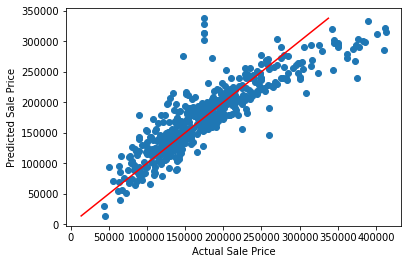

In [ ]:
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {np.sqrt(mse)}")

RMSE: 33942.40730030891


In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 10)
mse = results.mean()
rmse = np.sqrt(abs(results.mean()))
print(f"CV RMSE: {rmse}")

CV RMSE: 34919.90442953543


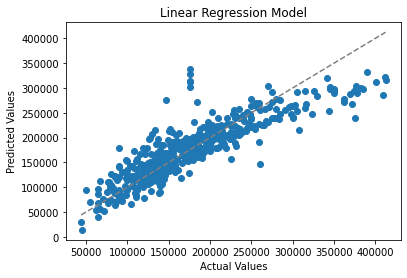

In [ ]:
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')

# Set the x-axis label
plt.xlabel('Actual Values')

# Set the y-axis label
plt.ylabel('Predicted Values')

# Set the plot title
plt.title('Linear Regression Model')

# Show the plot
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean squared error: 1152087013.34
R-squared: 0.76
